<a href="https://colab.research.google.com/github/madduvatsalya/DataScience_Projects/blob/main/Stock_Prediction_Project_Bharat_Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prediction uusing LSTM
Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. Introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network.

In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# Load csv
df = pd.read_csv('/content/drive/MyDrive/preprocessed_CAC40.csv', parse_dates=['Date'])

In [3]:
def load_data(company, start, end):
    """
    Load data for the specified company and date range.

    :param company: The company's stock symbol (str)
    :param start: The starting date for the data range (str or datetime)
    :param end: The ending date for the data range (str or datetime)
    :return: A dataframe containing the relevant stock data (pandas.DataFrame)
    """
    dataframe = df.copy()
    dataframe = dataframe.loc[dataframe.Name == company, :]
    dataframe = dataframe.loc[(dataframe['Date'] > start) & (dataframe['Date'] < end), :]
    dataframe = dataframe.rename(columns = {'Closing_Price': 'Close'})
    return dataframe

In [4]:
COMPANY = 'Accor'
START_DATE = dt.datetime(2015,1,1)
END_DATE = dt.datetime(2020,1,1)

START_DATE_TEST = END_DATE

In [5]:
data = load_data(company = COMPANY,
                 start = START_DATE,
                 end = END_DATE)

In [6]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [7]:
# Set the number of days used for prediction
prediction_days = 60

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_days, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_days:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# **LSTM MODEL**

In [8]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

In [9]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [10]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = 'weights_best.hdf5',
    verbose = 2,
    save_best_only = True
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32,
    callbacks = [checkpointer]
)

Epoch 1/25
38/38 [==============================] - ETA: 0s - loss: 0.0374

38/38 [==============================] - 11s 97ms/step - loss: 0.0374
Epoch 2/25
38/38 [==============================] - ETA: 0s - loss: 0.0102

38/38 [==============================] - 4s 96ms/step - loss: 0.0102
Epoch 3/25
38/38 [==============================] - ETA: 0s - loss: 0.0098

38/38 [==============================] - 7s 191ms/step - loss: 0.0098
Epoch 4/25
38/38 [==============================] - ETA: 0s - loss: 0.0088

38/38 [==============================] - 4s 96ms/step - loss: 0.0088
Epoch 5/25
38/38 [==============================] - ETA: 0s - loss: 0.0080

38/38 [==============================] - 4s 97ms/step - loss: 0.0080
Epoch 6/25
38/38 [==============================] - ETA: 0s - loss: 0.0082

38/38 [==============================] - 6s 146ms/step - loss: 0.0082
Epoch 7/25
38/38 [==============================] - ETA: 0s - loss: 0.0080

38/38 [==============================] - 4s 108ms/step - loss: 0.0080
Epoch 8/25
38/38 [==============================] - ETA: 0s - loss: 0.0082

38/38 [==============================] - 5s 118ms/step - loss: 0.0082
Epoch 9/25
38/38 [==============================] - ETA: 0s - loss: 0.0074

38/38 [==============================] - 5s 136ms/step - loss: 0.0074
Epoch 10/25
38/38 [==============================] - ETA: 0s - loss: 0.0076

38/38 [==============================] - 5s 140ms/step - loss: 0.0076
Epoch 11/25
38/38 [==============================] - ETA: 0s - loss: 0.0076

38/38 [==============================] - 6s 151ms/step - loss: 0.0076
Epoch 12/25
38/38 [==============================] - ETA: 0s - loss: 0.0067

38/38 [==============================] - 6s 170ms/step - loss: 0.0067
Epoch 13/25
38/38 [==============================] - ETA: 0s - loss: 0.0065

38/38 [==============================] - 5s 130ms/step - loss: 0.0065
Epoch 14/25
38/38 [==============================] - ETA: 0s - loss: 0.0067

38/38 [==============================] - 4s 98ms/step - loss: 0.0067
Epoch 15/25
38/38 [==============================] - ETA: 0s - loss: 0.0058

38/38 [==============================] - 6s 158ms/step - loss: 0.0058
Epoch 16/25
38/38 [==============================] - ETA: 0s - loss: 0.0058

38/38 [==============================] - 4s 96ms/step - loss: 0.0058
Epoch 17/25
38/38 [==============================] - ETA: 0s - loss: 0.0052

38/38 [==============================] - 5s 124ms/step - loss: 0.0052
Epoch 18/25
38/38 [==============================] - ETA: 0s - loss: 0.0058

38/38 [==============================] - 8s 200ms/step - loss: 0.0058
Epoch 19/25
38/38 [==============================] - ETA: 0s - loss: 0.0054

38/38 [==============================] - 6s 152ms/step - loss: 0.0054
Epoch 20/25
38/38 [==============================] - ETA: 0s - loss: 0.0052

38/38 [==============================] - 6s 149ms/step - loss: 0.0052
Epoch 21/25
38/38 [==============================] - ETA: 0s - loss: 0.0056

38/38 [==============================] - 5s 132ms/step - loss: 0.0056
Epoch 22/25
38/38 [==============================] - ETA: 0s - loss: 0.0054

38/38 [==============================] - 5s 119ms/step - loss: 0.0054
Epoch 23/25
38/38 [==============================] - ETA: 0s - loss: 0.0051

38/38 [==============================] - 6s 171ms/step - loss: 0.0051
Epoch 24/25
38/38 [==============================] - ETA: 0s - loss: 0.0048

38/38 [==============================] - 4s 99ms/step - loss: 0.0048
Epoch 25/25
38/38 [==============================] - ETA: 0s - loss: 0.0052

38/38 [==============================] - 4s 97ms/step - loss: 0.0052


In [11]:
# Load test data for the specified company and date range
test_data = load_data(
    company=COMPANY,
    start=START_DATE_TEST,
    end=dt.datetime.now()
)

# Extract the actual closing prices from the test data
actual_prices = test_data['Close'].values

# Concatenate the training and test data along the 'Close' column
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

# Extract the relevant portion of the dataset for model inputs
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

# Reshape the model inputs to a 2D array with a single column
model_inputs = model_inputs.reshape(-1, 1)

# Apply the same scaling used for training data to the model inputs
model_inputs = scaler.transform(model_inputs)

In [12]:
# Initialize an empty list for test data input
x_test = []

# Iterate through the model inputs, starting from the prediction_days index
for x in range(prediction_days, len(model_inputs)):
    # Append the previous 'prediction_days' values to x_test
    x_test.append(model_inputs[x-prediction_days:x, 0])

# Convert the x_test list to a numpy array
x_test = np.array(x_test)

# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate price predictions using the LSTM model
predicted_prices = model.predict(x_test)

# Invert the scaling applied to the predicted prices to obtain actual values
predicted_prices = scaler.inverse_transform(predicted_prices)

3/3 [==============================] - 2s 23ms/step


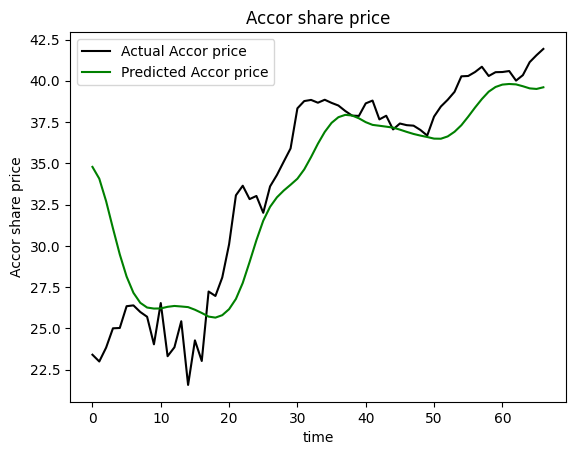

In [13]:
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title(f"{COMPANY} share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()

In [14]:
# Extract the last 'prediction_days' values from the model inputs
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]

# Convert the real_data list to a numpy array
real_data = np.array(real_data)

# Reshape real_data to a 3D array with the appropriate dimensions for the LSTM model
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

# Generate a prediction using the LSTM model with the real_data input
prediction = model.predict(real_data)

# Invert the scaling applied to the prediction to obtain the actual value
prediction = scaler.inverse_transform(prediction)

# Print the prediction result to the console
print(f"Prediction: {prediction[0][0]}")

1/1 [==============================] - 1s 1s/step
Prediction: 39.837921142578125


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
